Actividad: Evaluación de la segmentación

Objetivos

El objetivo de este trabajo es aprender a construir y evaluar el rendimiento de uno o más segmentadores. 
Esta actividad permitirá consolidar los conceptos sobre segmentación de imágenes aprendidos.


Descripción

Nos vamos a enfrentar a un verdadero problema de segmentación. La segmentación, como se ha visto, consiste en detectar regiones homogéneas y aislar/detectar objetos dentro de una imagen. Estas regiones habitualmente corresponden a los objetos que se están queriendo identificar. 

Existen muchas maneras de enfocar este problema y puedes hacer uso de las técnicas de segmentación que consideres para resolverlo. Una vez elegidas estas técnicas, debes evaluar su rendimiento frente a imágenes de ground truth. En caso de que se utilicen partes de un software existente, deberá referenciarse la fuente. Debes mostrar en pantalla los resultados de los principales pasos. 

Escoge una o dos imágenes que consideres representativas de un determinado problema y aplica varios segmentadores sobre ellas para evaluar cuál de ellos ofrece el mejor resultado.


Objetivo de segmentacion Imagen 1

poder separar al gato moss de la imagen sin afectar su estructura, se analizara minimo 2 metodos para su analisis y de ahi se eligira el mejor.

In [2]:
import cv2 as cv
import numpy as np
import PIL
from PIL import Image
from matplotlib import pyplot as plt
import skimage
import skimage.io
import skimage.color
from skimage.filters import threshold_multiotsu
from skimage import io,data,img_as_ubyte
from skimage import color

In [3]:
y = np.zeros(256)
x = np.linspace(0,255,num=256,dtype = np.uint8)

def sacar_histograma(foto):
    ancho , alto = foto.shape
    #recorre toda la imagen pixel por pixel
    for w in range(ancho):
        for h in range (alto):
            v = foto[w,h]
            #modificamos y[v] = y[v]+1;
            y[v] = y[v]+1
            
    plt.bar(x,y)
    plt.show()

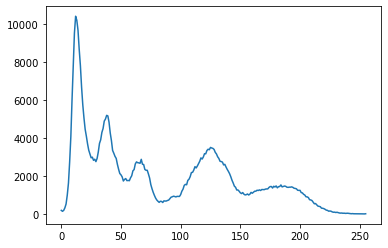

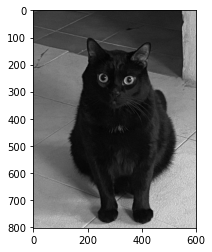

In [4]:
#leemos la imagen de moss y la convertimos a gris para su analisis.
Moss =Image.open("Moss.jpg").convert('L')
Moss.save('gray_Moss.jpg')
#volvemos a cargar a Moss , pero ya en gris.
Moss = cv.imread('gray_Moss.jpg')
#calculamos histograma de Moss y lo imprimimos
histmoss = cv.calcHist([Moss], [0], None, [256], [0, 256])
plt.plot(histmoss)
fmoss = plt.figure()
plt.imshow(Moss)

In [5]:
#definimos el umbral que vamos a usar
u =30
#se aplica la segmentacion por umbral Truncado y umbral binario
_,th1 = cv.threshold(Moss, u ,255,cv.THRESH_BINARY)
_,th3 = cv.threshold(Moss, u ,255,cv.THRESH_TRUNC)
#se multiplica las imagenes para que el resultado se muestre mas claro.
MossTruncado = th3*7
MossBinario = th1*5

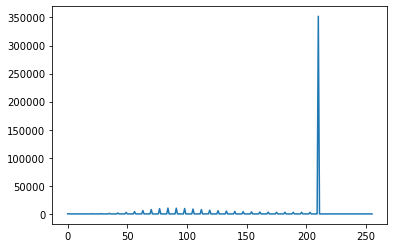

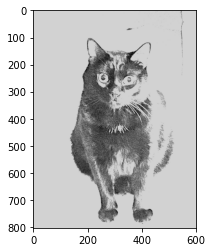

In [6]:
#mostramos los resultados
histmosstrun = cv.calcHist([MossTruncado], [0], None, [256], [0, 256])
plt.plot(histmosstrun)
fmoss = plt.figure()
plt.imshow(MossTruncado)

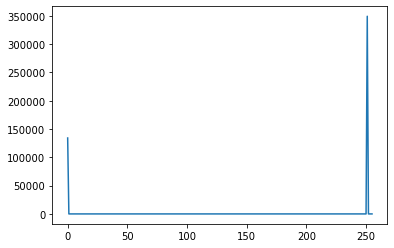

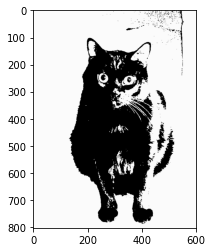

In [7]:
#Moss binario con su histograma
histmossbin = cv.calcHist([MossBinario], [0], None, [256], [0, 256])
plt.plot(histmossbin)
fmoss = plt.figure()
plt.imshow(MossBinario)
#MossBinario.save('Moss_Binario.jpg')
plt.imsave('Moss_Binario.jpg',MossBinario)
#plt.imsave(s, img, format='png')

Analizando las imagenes, nos podemos dar cuenta que la mejor segmentacion puede ser la imagen con el algoritmo de umbral binario, ya que la imagen con umbral truncado aun contiene ruido que puede afectar a futuro. A continuacion se hara la comparacion con la imagen grounded truth, dado por entendido que el objetivo se cumplio.

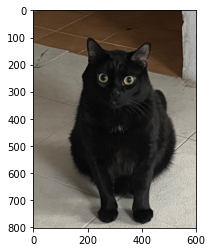

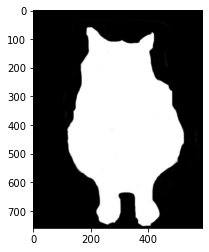

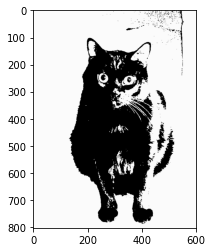

In [8]:
#leemos la imagen de moss grounded truth

MossOR =Image.open("Moss.jpg")
fmoss = plt.figure()
plt.imshow(MossOR)

MossGT =Image.open("Moss Grounded Truth.jpg")
fmoss = plt.figure()
plt.imshow(MossGT)

fmoss = plt.figure()
plt.imshow(MossBinario)



Objetivo de segmentación Imagen 

Poder separar al gato Nilo de su cuerpo,dejando unicamente su cabeza/rostro. Se realizaran minimo 2 métodos para su análisis y de ahi se eligirá el mejor.

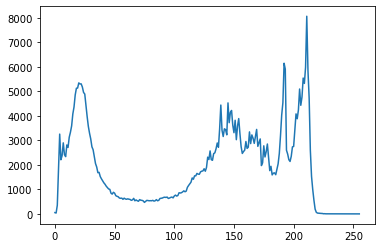

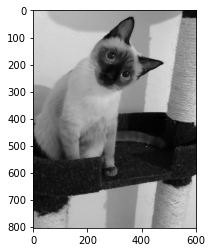

In [9]:
#leemos la imagen de nilo y la convertimos a gris para su analisis.
Nilo =Image.open("nilo.jpg").convert('L')
Nilo.save('gray_Nilo.jpg')
#volvemos a cargar a Moss , pero ya en gris.
Nilo = cv.imread('gray_Nilo.jpg',cv.IMREAD_GRAYSCALE)
#calculamos histograma de Moss y lo imprimimos
#a, b, c = cv.split(Nilo)
histnilo = cv.calcHist([Nilo], [0], None, [256], [0, 256])
plt.plot(histnilo)
fmoss = plt.figure()
plt.imshow(Nilo, cmap='gray')

In [10]:
#definimos el umbral que vamos a usar
u = 80
#se aplica la segmentacion por umbral Binario invertido
_,NiloBinInv = cv.threshold(Nilo,u,255,cv.THRESH_BINARY_INV)
#umbral de Otsu
#Otsu solamente admite un canal.
_,NiloOtsu = cv.threshold(Nilo,0,255,cv.THRESH_BINARY + cv.THRESH_OTSU)

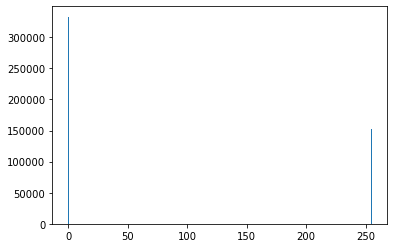

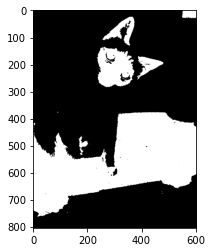

In [11]:
#calculamos histograma de Nilo 
sacar_histograma(NiloBinInv)
#plt.imshow(histniloinv)
fmoss = plt.figure()
plt.imshow(NiloBinInv,cmap='gray')

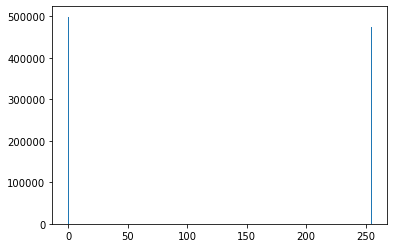

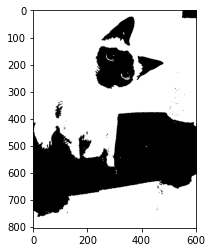

In [12]:
#calculamos histograma de Nilo 
sacar_histograma(NiloOtsu)
#se visualiza en gris para su mejor analisis.
plt.imshow(NiloOtsu , cmap='gray')
plt.imsave('Nilo_Otsu.jpg',NiloOtsu)

Como podemos observar , para este caso la mejor opcion que se tiene para segmentar el cuerpo del gato Nilo de su cabeza, es usando Otsu. Aunque los histogramas de ambos algoritmos es identico, analizando la imagen con mas detenimiento usando el ojo humano, podemos darnos cuento de eso. A continuacion se realizara la comparacion con la imagen grounded truth.

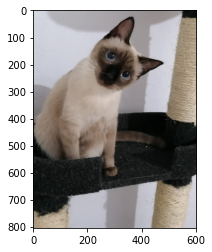

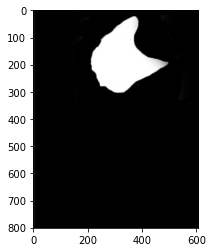

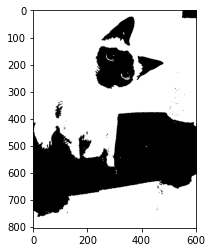

In [13]:
#leemos la imagen de nilo grounded truth

NiloOR =Image.open("Nilo.jpg")
fmoss = plt.figure()
plt.imshow(NiloOR)

NiloGT =Image.open("Nilo Grounded Truth.jpg")
fnilo = plt.figure()
plt.imshow(NiloGT)

fnilo = plt.figure()
plt.imshow(NiloOtsu , cmap='gray')